In [16]:
import numpy as np
import pandas as pd
import matrix
import model
import analysis as an
import plot

In [52]:
def analysis(init, patterns, end_time):
    """sparsity_analysis.
    Generate simulation data to analyze how K_ac
    sparsity affects model dynamics.

    :param init:  inital abudance vector
    :param pattern: matrix patterns to test
    :param end_time: time steps to simulate
    """
    rows, n = [], len(init)
    fixation_times = []
    for pattern in patterns:
        curr_mat = matrix.pattern_matrix(pattern, n)
        
        # simulate model with given params
        t, N, S, E, P = model.simulate(curr_mat, init, end_time)
        # N, S are variables by time points matrices
        
        
        # Calculate statistics
        row = {"pattern": pattern}
        
        row["initial_conditions"] = init
        
        # Compute time to fixation
        row['fixation_time'] = len(N[0])
        
        # Compute growth rate
        row["growth_rate"] = an.growth_rate(N.T)
        
        N = np.apply_along_axis(an.normalize, 1, N.T).T
        
        # Compute skewness 
        row["skewness"] = np.average(an.skewness(N.T))
        
        # Compute richness
        richnessVals = [an.richness(i) for i in N.T]
        row["richness"] = np.average(richnessVals)
        
        # Compute shannon index
        row["shannon index"] = np.average(an.shannon_index(N.T))
        
        # Add Bray Curtis distance metric array for each K_ac simulation
        brayCurtisMtx = np.identity(n)
        for i in range(n):
            for j in range(i + 1, n):
                brayCurtisMtx[i, j] = an.bray_curtis(N[i], N[j])
        row["bray curtis"] = brayCurtisMtx
        
        # store for easy conversion to a dataframe
        rows.append(row)
        
    return pd.DataFrame(rows)

In [53]:
patterns = ['null', 'ident', 'barbell', 'cycle', 'complete', 'star']

In [54]:
analysis([0.01, 0.002, 0.05, 0.03], patterns, 50)

,pattern,initial_conditions,fixation_time,growth_rate,skewness,richness,shannon index,bray curtis
0,null,"[0.01, 0.002, 0.05, 0.03]",72,-0.007797,2.161056e-01,1.0,18.382565,"[[1.0, 0.6666666666666664, 0.6666666666666665,..."
1,ident,"[0.01, 0.002, 0.05, 0.03]",87,0.043022,-1.214510e-01,1.0,26.197754,"[[1.0, 0.3235311527256144, 0.3989076713126255,..."
2,barbell,"[0.01, 0.002, 0.05, 0.03]",155,0.007589,2.294018e-01,1.0,33.845874,"[[1.0, 0.9660479569735431, 0.47984313520475175..."
3,cycle,"[0.01, 0.002, 0.05, 0.03]",89,0.041799,5.551115e-16,1.0,19.998221,"[[1.0, 0.8043762604488767, 0.6666666666666669,..."
4,complete,"[0.01, 0.002, 0.05, 0.03]",65,0.061861,-3.884153e-01,1.0,14.706530,"[[1.0, 0.6744510241216137, 0.7658454918340117,..."
5,star,"[0.01, 0.002, 0.05, 0.03]",143,0.005508,-3.351899e-01,1.0,32.066674,"[[1.0, 0.43817174700137684, 0.8552616606044394..."


In [75]:
inits = [[0.01, 0.002, 0.05, 0.03], [0.001, 0.001, 0.005, 0.003]]


columns_names = ["pattern", "initial_conditions", "fixation_time", "growth_rate", "skewness", "richness", "shannon_index", "bray curtis"]
big_df = pd.DataFrame(columns=columns_names)
for init in inits:
    res = analysis(init, patterns, 50)
    big_df = big_df.append(res)
big_df.set_index("pattern", inplace=True)


for pattern in patterns:
    
    pattern_df = big_df.loc[pattern]
    print(pattern_df.head())


                   initial_conditions fixation_time  growth_rate  skewness  \
pattern                                                                      
null        [0.01, 0.002, 0.05, 0.03]            72    -0.007797  0.216106   
null     [0.001, 0.001, 0.005, 0.003]            49     0.060246  0.715832   

         richness shannon_index  \
pattern                           
null          1.0           NaN   
null          1.0           NaN   

                                               bray curtis  shannon index  
pattern                                                                    
null     [[1.0, 0.6666666666666664, 0.6666666666666665,...      18.382565  
null     [[1.0, 0.0, 0.6666666666666667, 0.500000000000...      14.311460  
                   initial_conditions fixation_time  growth_rate  skewness  \
pattern                                                                      
ident       [0.01, 0.002, 0.05, 0.03]            87     0.043022 -0.121451   
ident   

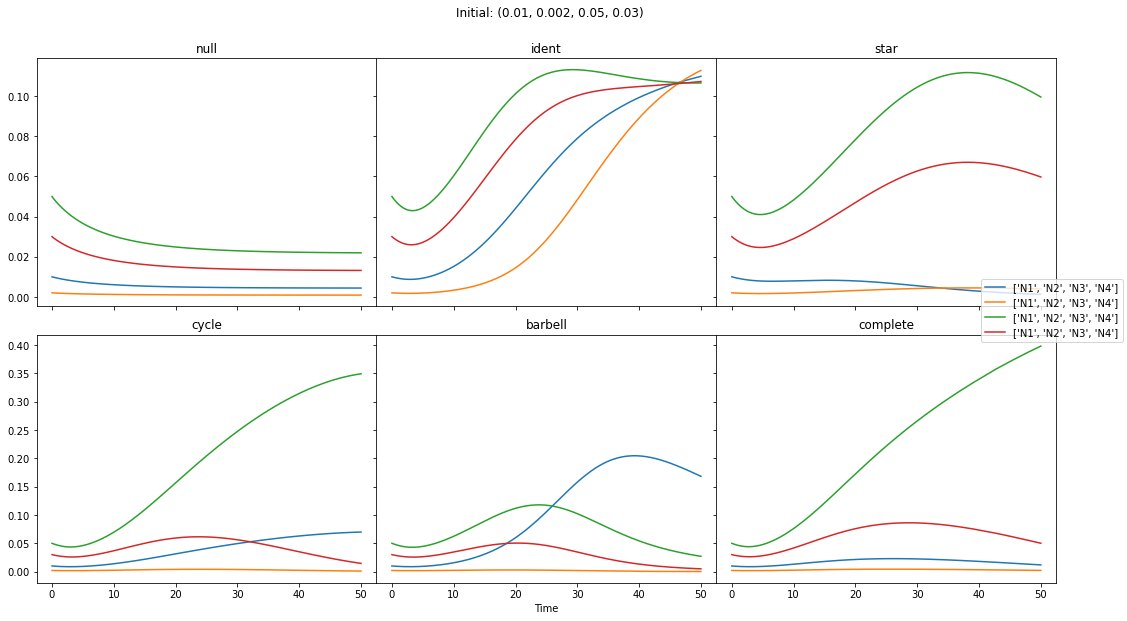

In [51]:
plot.matrix_comparisons([0.01, 0.002, 0.05, 0.03], 50)